# PREPARACIÓ
Identificar dades mancants i duplicats

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('imdb_top_1000.csv')

# Comprovar si hi ha dades mancants
print(df.isnull().sum())

# Comprovar si hi ha duplicats
duplicats = df.duplicated().sum()
print(f"Nombre de files duplicades: {duplicats}")

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
Nombre de files duplicades: 0


Hem trobat que hi ha dades mancants en 3 columnes les esborrem i tornem a veure si existeixen.

In [2]:
# Eliminar files amb valors nuls
df = df.dropna()

# Comprovar si hi ha dades mancants
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


# ESTADÍSTICA DESCRIPTIVA

Utilitzarem la funció `describe()` de **pandas**, obtenim un resum estadístic amb les següents mètriques:

## 1. `count`
- Nombre de valors no nuls en cada columna.
- Útil per identificar dades mancants.

## 2. `mean` (Mitjana)
- Mitjana aritmètica dels valors en la columna.
- Es calcula sumant tots els valors i dividint pel nombre total.

## 3. `std` (Desviació Estàndard)
- Mesura la dispersió dels valors al voltant de la mitjana.
- Una desviació estàndard alta indica valors més dispersos; una baixa indica concentració.

## 4. `min` (Valor mínim)
- Valor més petit de la columna.
- Pot ajudar a identificar valors extrems (outliers).

## 5. `25%` (Primer Quartil)
- Valor per sota del qual es troba el 25% dels valors.
- Representa el límit inferior del **quartil inferior**.

## 6. `50%` (Mediana)
- Valor central que divideix les dades en dues meitats.
- És menys sensible als valors extrems que la mitjana.

## 7. `75%` (Tercer Quartil)
- Valor per sota del qual es troba el 75% dels valors.
- Representa el límit inferior del **quartil superior**.

## 8. `max` (Valor màxim)
- Valor més gran de la columna.
- Pot ajudar a identificar possibles valors extrems.

In [ ]:
# Netejar i preparar les dades
# Convertir 'Runtime' a numèric (eliminar ' min') i 'Gross' a numèric (eliminar comes)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Seleccionar les columnes numèriques rellevants per a l'anàlisi
numerical_data = df[['IMDB_Rating', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']]

# Calcular estadístiques descriptives
descriptive_stats = numerical_data.describe()

# Imprimir estadístiques descriptives
descriptive_stats

,IMDB_Rating,Runtime,Meta_score,No_of_Votes,Gross
count,714.000000,714.000000,714.000000,7.140000e+02,7.140000e+02
mean,7.937115,123.715686,77.158263,3.561348e+05,7.851359e+07
std,0.293278,25.887535,12.401144,3.539011e+05,1.149780e+08
min,7.600000,72.000000,28.000000,2.522900e+04,1.305000e+03
25%,7.700000,104.250000,70.000000,9.600975e+04,6.157408e+06
50%,7.900000,120.000000,78.000000,2.366025e+05,3.485015e+07
75%,8.100000,136.000000,86.000000,5.077922e+05,1.024641e+08
max,9.300000,238.000000,100.000000,2.343110e+06,9.366622e+08


# VISUALTIZACIONS

Per identificar patrons i correlacions en les dades, generarem els següents gràfics utilitzant les llibreries **Matplotlib** i  **Seaborn**:
## 1. Histograma de `IMDB_Rating`
- **Objectiu**: Analitzar la distribució de les puntuacions IMDb.
- **Detalls**: Un histograma amb una línia KDE (Kernel Density Estimate) per visualitzar la freqüència de puntuacions i la seva distribució.

## 2. Boxplot de `Gross` (Ingressos bruts)
- **Objectiu**: Identificar outliers i comprendre la dispersió dels ingressos bruts.
- **Detalls**: Un gràfic de caixa (boxplot) per representar visualment els valors màxims, mínims i quartils.

## 3. Heatmap de la matriu de correlació
- **Objectiu**: Explorar la força i direcció de les correlacions entre variables numèriques.
- **Detalls**: Una matriu amb colors que representen correlacions (positives, negatives o neutres).

## 4. Scatterplot de `Runtime` vs. `IMDB_Rating`
- **Objectiu**: Identificar possibles relacions entre la durada de les pel·lícules i les puntuacions IMDb.
- **Detalls**: Un gràfic de dispersió per visualitzar si hi ha tendències clares.

---

## Llibreries Necessàries
- `pandas`: Per carregar i gestionar les dades.
- `matplotlib.pyplot`: Per crear visualitzacions bàsiques.
- `seaborn`: Per gràfics avançats i millora estètica.


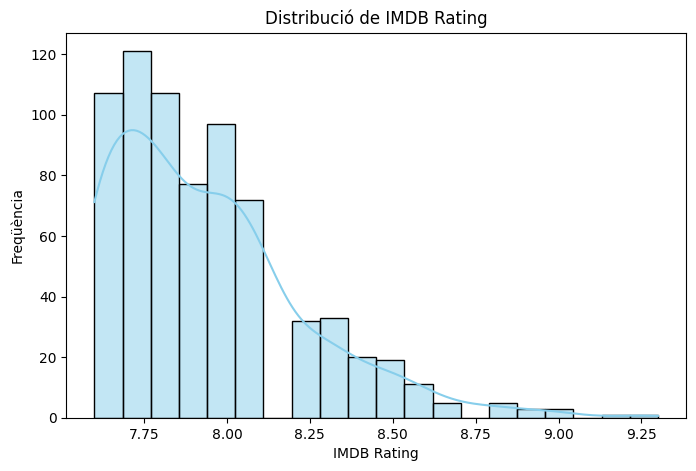

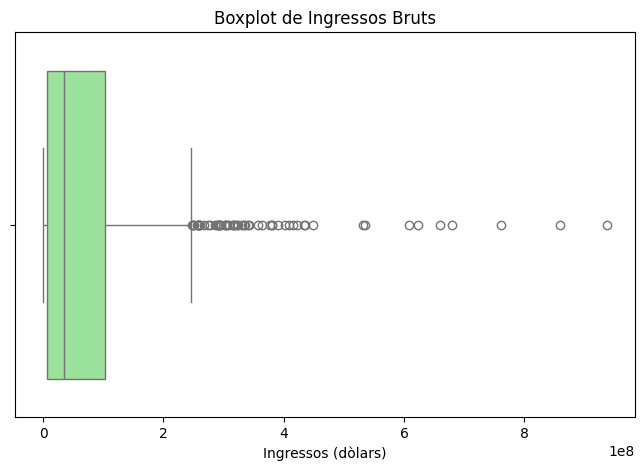

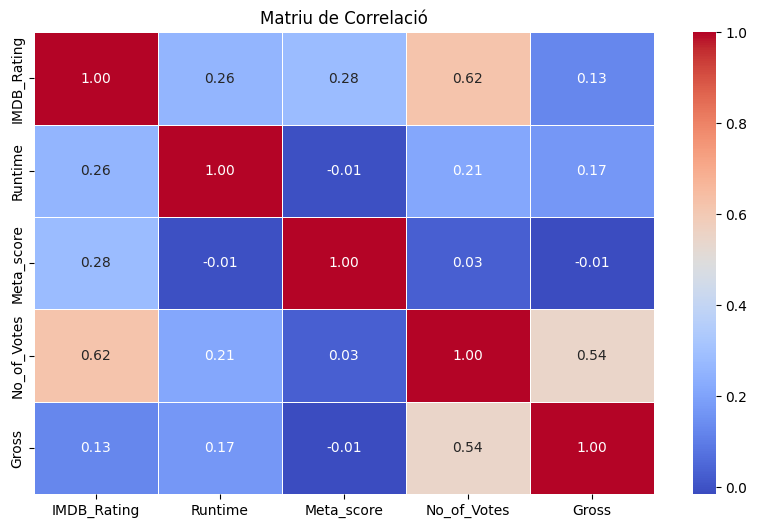

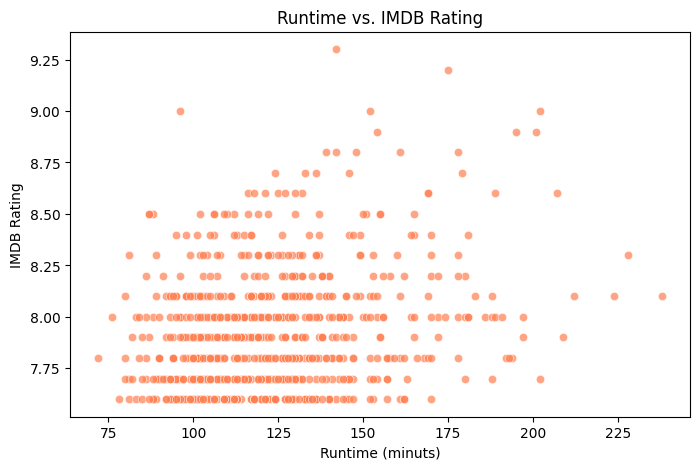

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of IMDB_Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDB_Rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribució de IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Freqüència')
plt.show()

# 2. Boxplot of Gross earnings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gross'], color='lightgreen')
plt.title('Boxplot de Ingressos Bruts')
plt.xlabel('Ingressos (dòlars)')
plt.show()

# 3. Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df[['IMDB_Rating', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriu de Correlació')
plt.show()

# 4. Scatter plot of Runtime vs. IMDB_Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Runtime'], y=df['IMDB_Rating'], color='coral', alpha=0.7)
plt.title('Runtime vs. IMDB Rating')
plt.xlabel('Runtime (minuts)')
plt.ylabel('IMDB Rating')
plt.show()